First 5 rows of the dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 

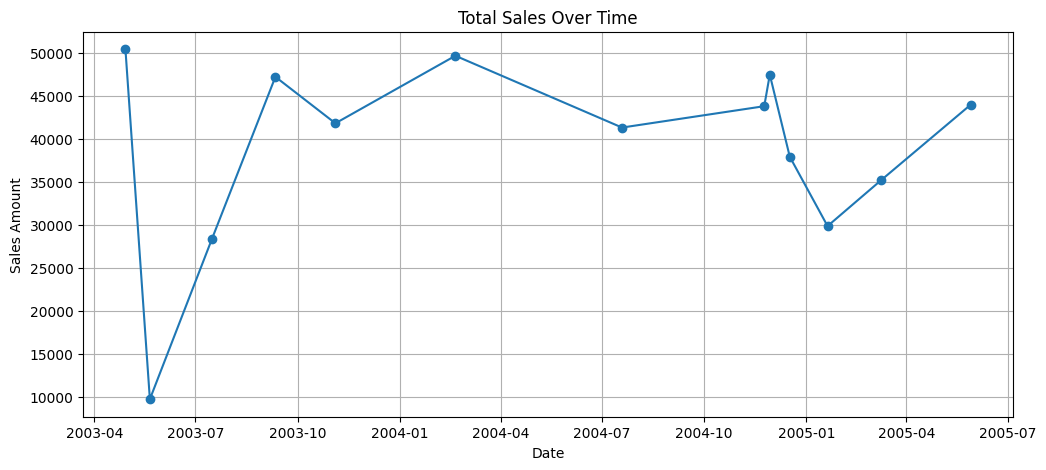

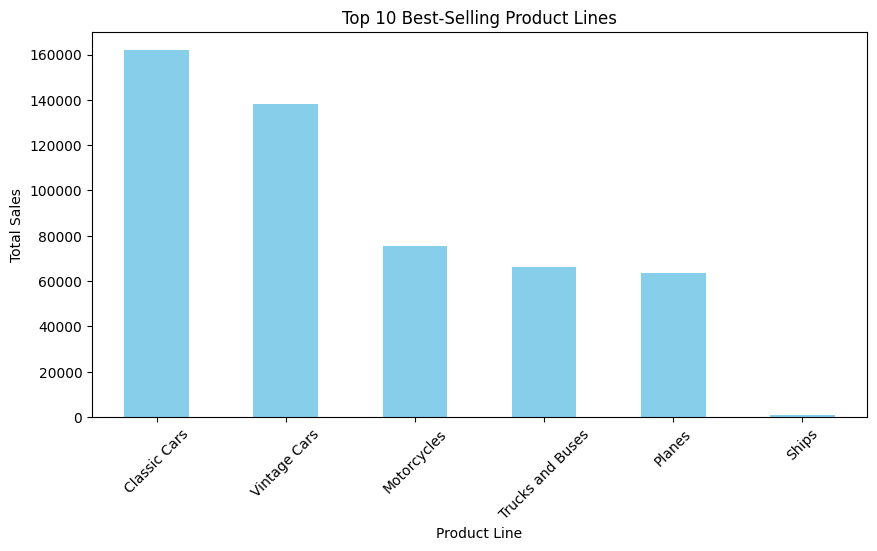

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("sales_data_sample.csv", encoding="ISO-8859-1")

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check dataset structure
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Confirm missing values are removed
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Convert 'ORDERDATE' to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Confirm changes
print("\nUpdated Data Types:")
print(df.dtypes)

# Basic summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Total Sales Over Time
df_grouped = df.groupby("ORDERDATE")["SALES"].sum()

plt.figure(figsize=(12,5))
plt.plot(df_grouped, marker='o', linestyle='-')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.grid()
plt.show()

# Top 10 Best-Selling Products
top_products = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False).head(10)

top_products.plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("Top 10 Best-Selling Product Lines")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
